t = 5.050505050505054


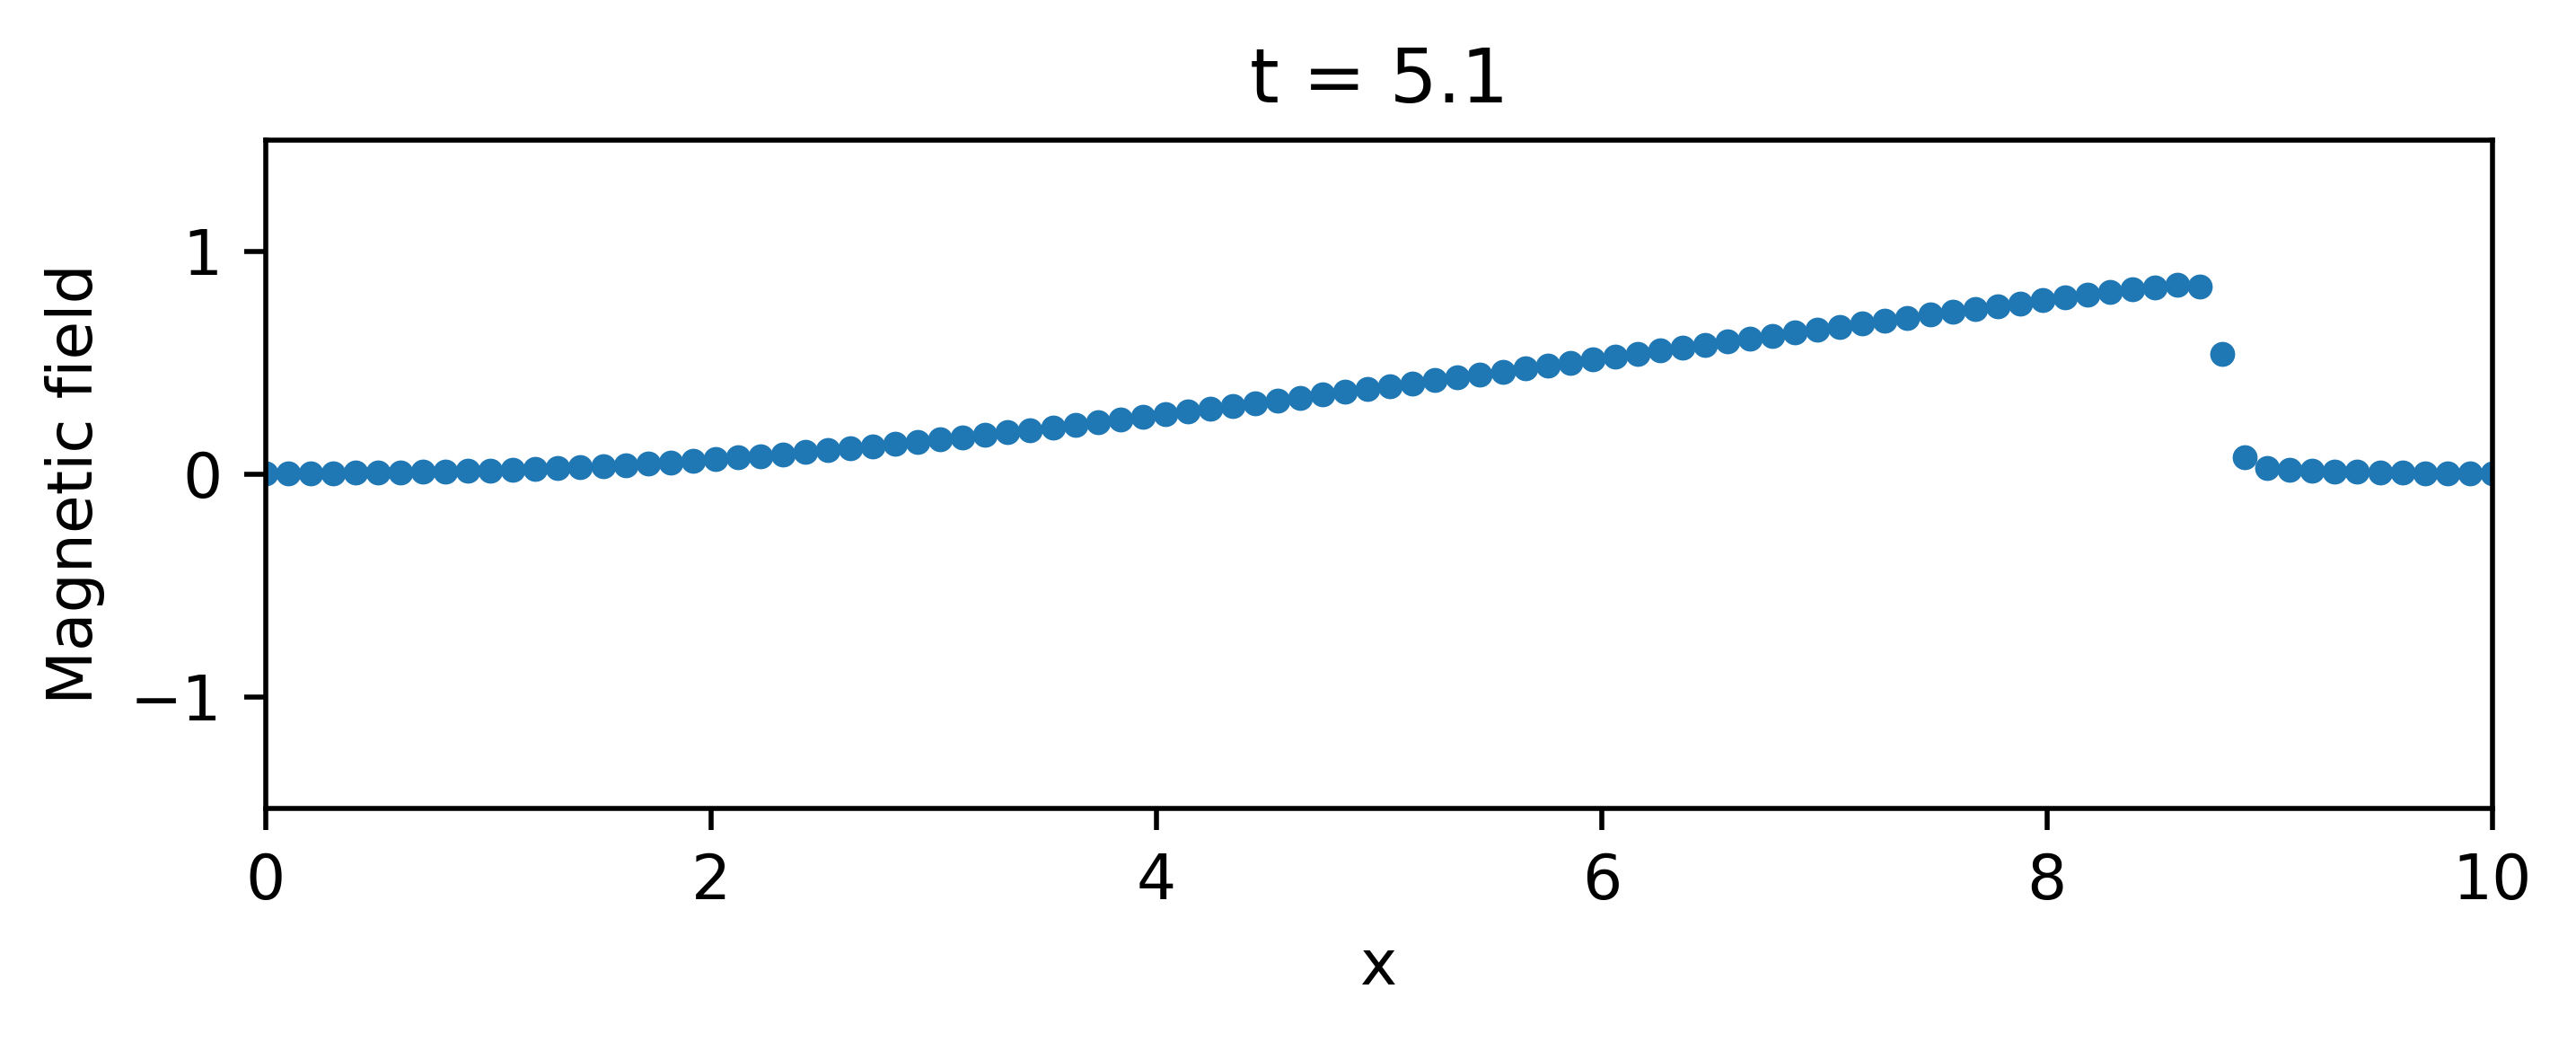

In [ ]:
#Solution of the advection equation using central, forward and backward difference


import numpy as np
import matplotlib . pyplot as plt
import matplotlib

#choose the scheme, by commenting out appropriately:

#Derivative = 'Central'
#Derivative = 'Forward'
Derivative = 'Backward'

n=500 #number of steps: Experiment with values 1, 100, 500

nx = 100 #x resolution

x_min = 0.
x_max = 10.

b = np. zeros (nx)
db_dt = np. zeros (nx)

sigma = 2.
x_m = 5.
eta = 0.01

x = np. zeros (nx)
t = 0.
dx = ( x_max - x_min ) / ( nx - 1 )
dt = dx * 0.1

for i in range (0, nx):
  x[i] = i * dx

#Here we initialise the magnetic field assuming it has a Gaussian profile: Experiment with positive and negative profiles by changing the sign in line 39.
for i in range (0, nx - 2):

  b[i] = np. exp( - ( ( x[i] - x_m ) / sigma )**2 )
  b [nx-1] = b [1]
  b [nx-2] = b [0]

for k in range (0, n):
  for i in range (1, nx -1):

    if (Derivative == 'Central'):
    # first derivative of the magnetic field (central difference scheme)

      dx_b = ( b[i + 1] - b[i - 1] ) / ( 2 * dx )



    # first derivative of the magnetic field (forward difference scheme)

    if (Derivative == 'Forward'):
      dx_b = ( b[i + 1] - b[i] ) / ( dx )

    # first derivative of the magnetic field (backward difference scheme)

    if (Derivative == 'Backward'):
      dx_b = ( b[i] - b[i-1] ) / ( dx )

    # second derivative of the magnetic field ( central difference scheme )

    dxx_b = 0.#( b[i + 1] - 2 * b[i] + b[i - 1] ) / dx**2

    #Evolution equation

    db_dt [i]= - b[i] * dx_b + eta * dxx_b

  #Renew the values

  for i in range (1, nx -1):
    b[i] = b[i] + db_dt [i] * dt
    # implement periodic boundary conditions
    b[nx - 1] = b[1]
    b[0] = b[nx - 2]

  t = t + dt


print (f"t = {t}")

fig = plt. figure (dpi = 500)
ax1 = fig. add_subplot (1 ,1 ,1 , aspect = 1, xlim =[ x_min ,
x_max ], ylim =[-1.5, 1.5])
plt . plot (x, b, '.')
plt . xlabel ('x')
plt . ylabel ('Magnetic field ')
plt . title (f"t = { round (t ,1)}")
plt . show ()
